# <a id='toc1_'></a>[CPPI extensions and stochastic processes](#toc0_)
3rd week, 2nd section, Introduction to Portfolio Construction and Analysis with Python.
Vijay Vaidyanathan & Lionel Martellini.  
Notes and code written by Benoît MARION.

**Table of contents**<a id='toc0_'></a>    
- [CPPI extensions and stochastic processes](#toc1_)    
  - [Lecture 1 - Monte Carlo simulations](#toc1_1_)    
  - [Lecture 2 - Analyzing CPPI stategies in a simulation context](#toc1_2_)    
  - [Lecture 3 - Designing and calibrating CPPI strategies](#toc1_3_)    
  - [Lab 1 - Random Walks and Monte Carlo](#toc1_4_)    
    - [Importing modules and data to get the different asset](#toc1_4_1_)    
    - [Random walk generation](#toc1_4_2_)    
    - [Upgrading the generation !!!](#toc1_4_3_)    
  - [Lab 2 - Interactive plots of Monte Carlo Simulations of CPPI and GBM](#toc1_5_)    
    - [Importing modules and data to get the different asset](#toc1_5_1_)    
    - [Little test on ipywidgets !](#toc1_5_2_)    
    - [GBM interactive plots](#toc1_5_3_)    
    - [Interactive CPPI simulation 1](#toc1_5_4_)    
    - [Interactive CPPI simulation 2](#toc1_5_5_)    
    - [Interactive CPPI simulation 3](#toc1_5_6_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_1_'></a>[Lecture 1 - Monte Carlo simulations](#toc0_)

Variance and returns are empirically unstable and vary over time. In order to get more reasonable stochastic scenario we need to take that into account. The returns and volatility can be represented as stochastic processes, often by mean-reverting processes.

## <a id='toc1_2_'></a>[Lecture 2 - Analyzing CPPI stategies in a simulation context](#toc0_)

In the Lab we will make an interactive tool to see the possible scenarios based on browninan movement. In this tool we can modify interactively the parameters and see how the portfolio might evolve.  
   
This tool also includes CPPI modelization. It highlights that thanks to perfect CPPI (constant imbalancing) our account wealth can never go below the floor. With low levels of volatility it will nearly never go below the floor even at low frequency of balancing.

## <a id='toc1_3_'></a>[Lecture 3 - Designing and calibrating CPPI strategies](#toc0_)

If volatility increases, the number floor violation increases directly.  
The investor has 2 solutions:
- imbalance more frequently 
- have a lower multiplier to be less aggressive

Clearly, there is an interaction between m and the volatility.

## <a id='toc1_4_'></a>[Lab 1 - Random Walks and Monte Carlo](#toc0_)

The core equation we are going to work with:
$$ \frac{S_{t+dt}-S_t}{S_t}=\mu dt + \sigma \sqrt{dt} \zeta_t $$

### <a id='toc1_4_1_'></a>[Importing modules and data to get the different asset](#toc0_)

In [5]:
import add_doc_path
import finance_pkg.Edhec_risk_kit as erk

import pandas as pd
import numpy as np

### <a id='toc1_4_2_'></a>[Random walk generation](#toc0_)

In [6]:
def gbm(n_years=10,n_scenarios=1000,mu=.07,sigma=.15,steps_per_year=12,s_0=100):
    #Evolution of a Stock price using a Geometric Brownian Motion Model
    dt=1/steps_per_year
    n_steps=int(n_years*steps_per_year)
    xi=np.random.normal(size=(n_steps,n_scenarios))
    rets=mu*dt+sigma*np.sqrt(dt)*xi
    rets=pd.DataFrame(rets)
    
    return s_0*(1+rets).cumprod()

<AxesSubplot: >

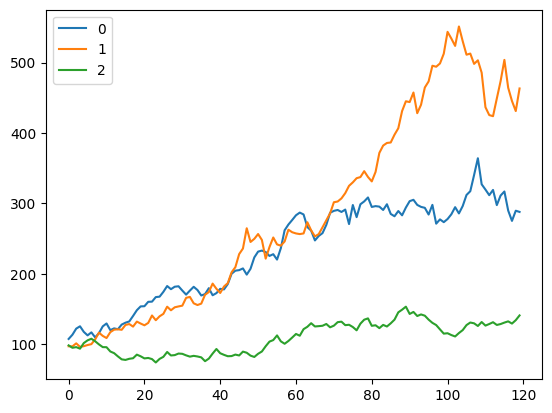

In [7]:
p=gbm(10, n_scenarios=3)
p.plot()

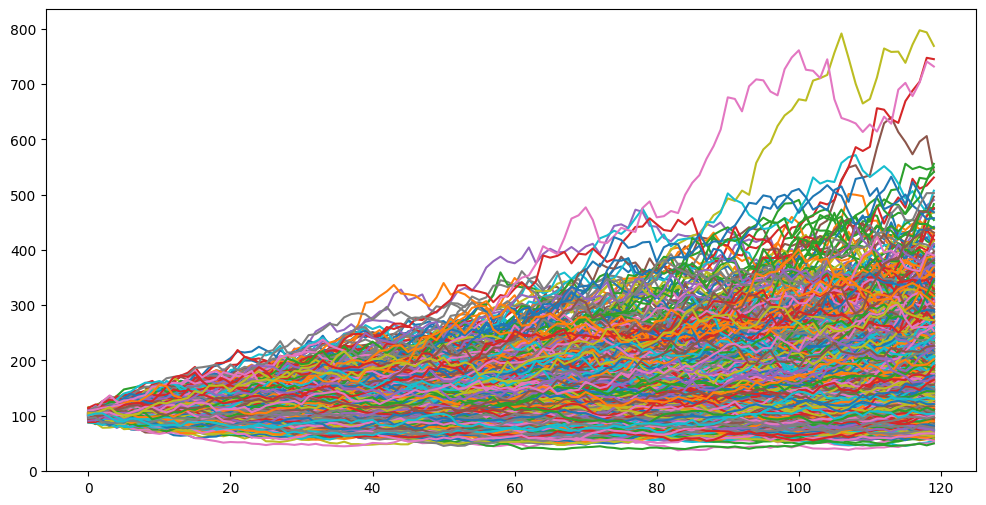

In [9]:
p=gbm(n_years=10, n_scenarios=1000).plot(figsize=(12,6), legend=False)

As we can se the generation remains a bit slow, let's make it faster !

### <a id='toc1_4_3_'></a>[Upgrading the generation !!!](#toc0_)

In [21]:
def gbm0(n_years=10,n_scenarios=1000,mu=.07,sigma=.15,steps_per_year=12,s_0=100):
    #Evolution of a Stock price using a Geometric Brownian Motion Model
    dt=1/steps_per_year
    n_steps=int(n_years*steps_per_year)
    xi=np.random.normal(size=(n_steps,n_scenarios))
    rets=mu*dt+sigma*np.sqrt(dt)*xi
    rets=pd.DataFrame(rets)
    
    return s_0*(1+rets).cumprod()

def gbm1(n_years=10,n_scenarios=1000,mu=.07,sigma=.15,steps_per_year=12,s_0=100):
    #Evolution of a Stock price using a Geometric Brownian Motion Model
    dt=1/steps_per_year
    n_steps=int(n_years*steps_per_year)
    rets_plus1=np.random.normal(loc=(1+mu*dt),scale=(sigma*np.sqrt(dt)),size=(n_steps,n_scenarios))    
    price=s_0*pd.DataFrame(rets_plus1).cumprod()
    return price

In [22]:
%timeit gbm0(n_years=5,n_scenarios=1000)

3.47 ms ± 836 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [23]:
%timeit gbm1(n_years=5,n_scenarios=1000)

2.44 ms ± 145 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<AxesSubplot: >

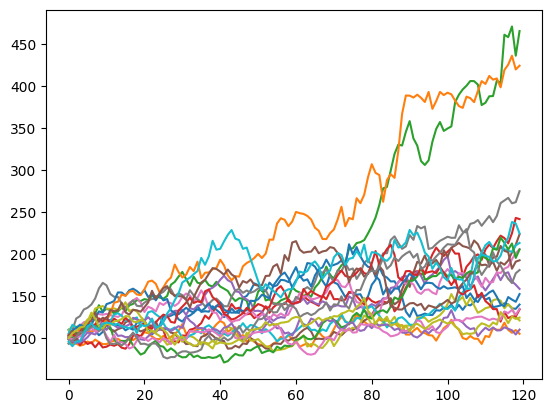

In [24]:
gbm1(n_years=10, n_scenarios=20).plot(legend=False)

The programs runs faster but the values are not starting as 0

In [27]:
def gbm1(n_years=10,n_scenarios=1000,mu=.07,sigma=.15,steps_per_year=12,s_0=100):
    #Evolution of a Stock price using a Geometric Brownian Motion Model
    dt=1/steps_per_year
    n_steps=int(n_years*steps_per_year)
    rets_plus1=np.random.normal(loc=(1+mu*dt),scale=(sigma*np.sqrt(dt)),size=(n_steps,n_scenarios))    
    rets_plus1[0]=1
    price=s_0*pd.DataFrame(rets_plus1).cumprod()
    return price

<AxesSubplot: >

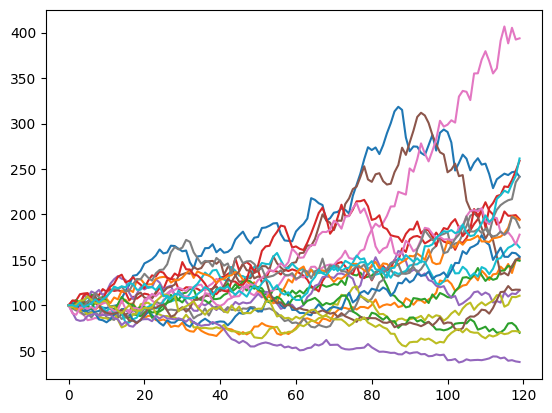

In [28]:
gbm1(n_years=10, n_scenarios=20).plot(legend=False)

## <a id='toc1_5_'></a>[Lab 2 - Interactive plots of Monte Carlo Simulations of CPPI and GBM](#toc0_)

### <a id='toc1_5_1_'></a>[Importing modules and data to get the different asset](#toc0_)

In [1]:
import add_doc_path
import finance_pkg.Edhec_risk_kit as erk

import pandas as pd
import numpy as np

import ipywidgets as widgets
from IPython.display import display

import matplotlib.pyplot as plt


### <a id='toc1_5_2_'></a>[Little test on ipywidgets !](#toc0_)

In [2]:
def squarit(n):
    return n*n

In [3]:
widgets.interact(squarit, n=(0,100))

interactive(children=(IntSlider(value=50, description='n'), Output()), _dom_classes=('widget-interact',))

<function __main__.squarit(n)>

### <a id='toc1_5_3_'></a>[GBM interactive plots](#toc0_)

<AxesSubplot: >

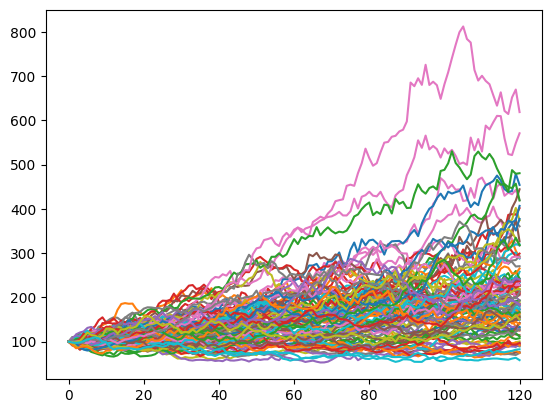

In [4]:
erk.gbm(10, 100).plot(legend=False)

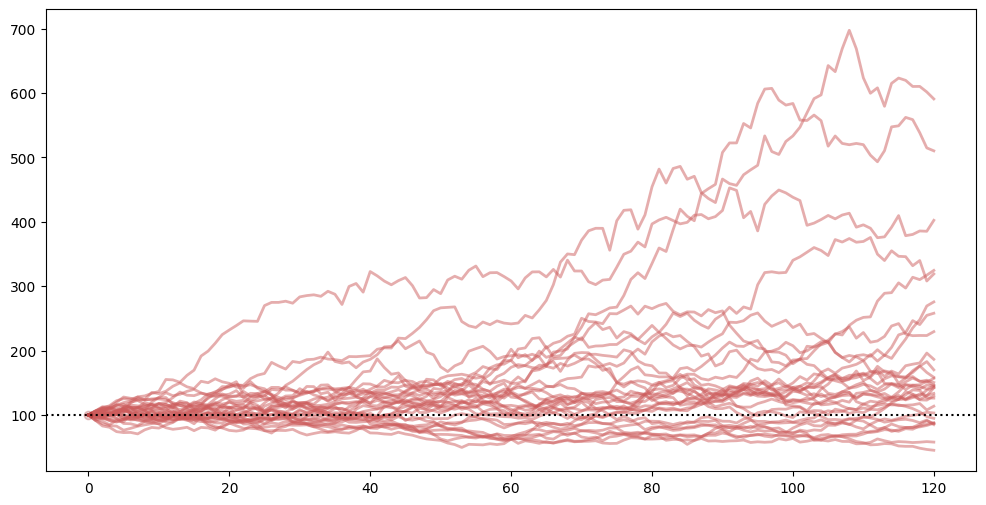

In [5]:
erk.show_gbm(n_scenarios=30)

In [6]:
gbm_controls=widgets.interactive(erk.show_gbm,
                                n_scenarios=(1,20,5),
                                mu=(-.2,.2,.01),
                                sigma=(0,.3,.01),
                                s_0=(0,1000,100))

In [7]:
display(gbm_controls)

interactive(children=(IntSlider(value=20, description='n_scenarios', max=20, min=1, step=5), FloatSlider(value…

### <a id='toc1_5_4_'></a>[Interactive CPPI simulation 1](#toc0_)

In [8]:
cppi_controls=widgets.interactive(erk.show_cppi0,
                                n_scenarios=widgets.IntSlider(min=1,max=1000,step=5,value=50),
                                mu=(0,.2,.01),
                                sigma=(0,.3,.05),
                                floor=(0,2,.1),
                                m=(1,5,.5),
                                riskfree_rate=(0,.05,.01),
                                y_max=widgets.IntSlider(min=0,max=100,step=1,value=100,description="unzoom Y-axis"))

In [9]:
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

### <a id='toc1_5_5_'></a>[Interactive CPPI simulation 2](#toc0_)

We added an histogram of the terminal value to our code.

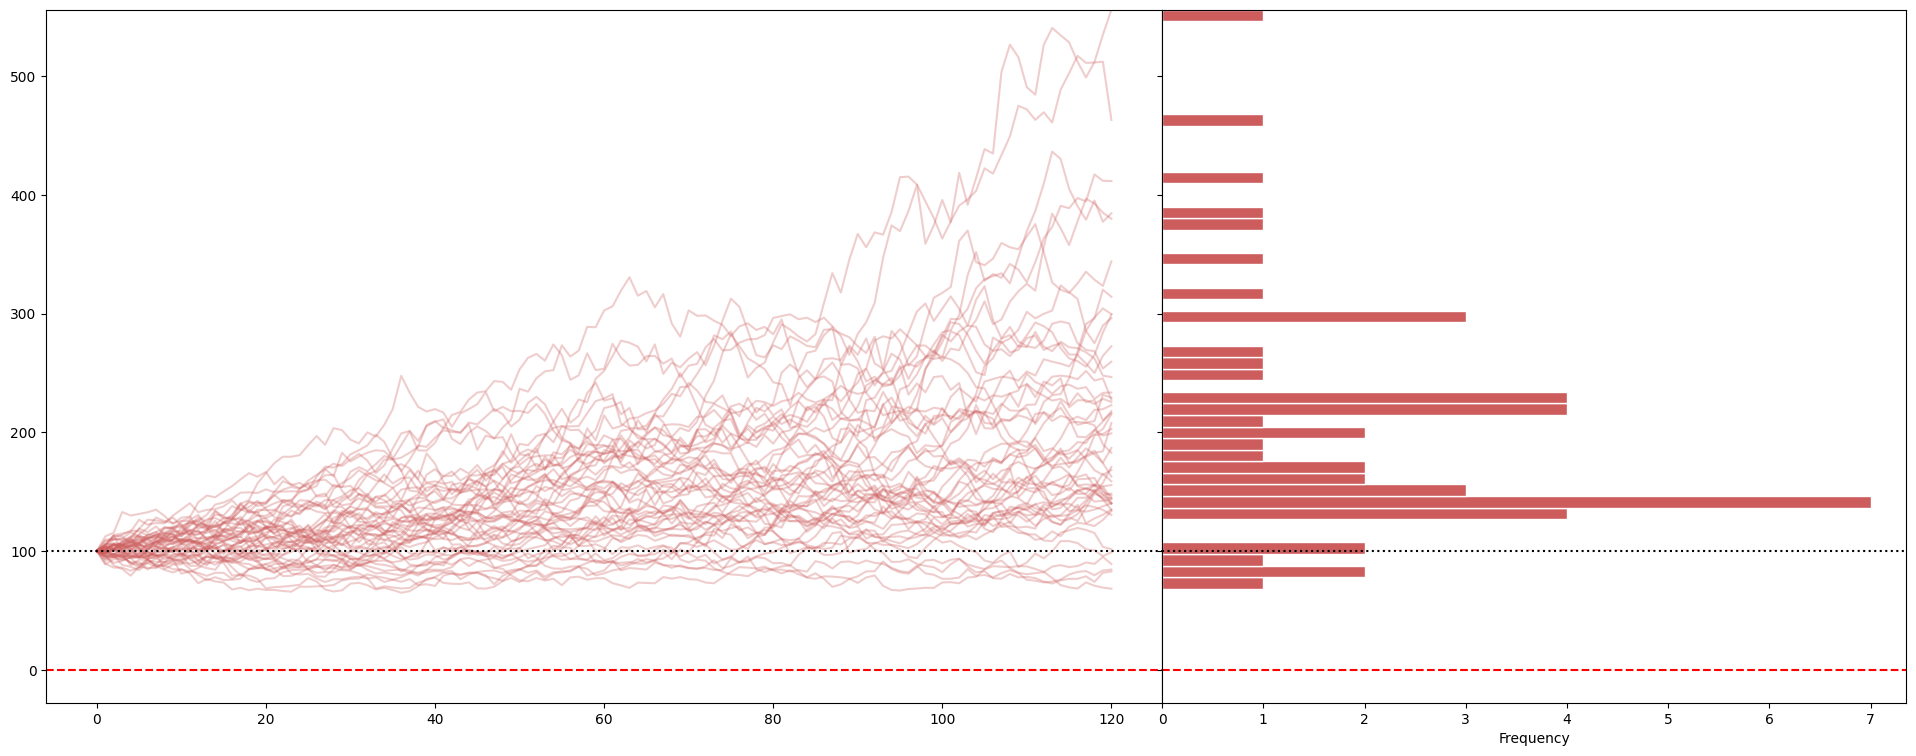

In [10]:
erk.show_cppi0bis()

In [11]:
cppi_controls=widgets.interactive(erk.show_cppi0bis,
                                n_scenarios=widgets.IntSlider(min=1,max=1000,step=5,value=50),
                                mu=(0,.2,.01),
                                sigma=(0,.3,.05),
                                floor=(0,2,.1),
                                m=(1,5,.5),
                                riskfree_rate=(0,.05,.01),
                                y_max=widgets.IntSlider(min=0,max=100,step=1,value=100,description="unzoom Y-axis"))

In [12]:
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

### <a id='toc1_5_6_'></a>[Interactive CPPI simulation 3](#toc0_)

Let's add some stats to our output

In [16]:
cppi_controls=widgets.interactive(erk.show_cppi,
                                n_scenarios=widgets.IntSlider(min=1,max=1000,step=5,value=50),
                                mu=(0,.2,.01),
                                sigma=(0,.5,.05),
                                floor=(0,2,.1),
                                m=(1,5,.5),
                                riskfree_rate=(0,.05,.01),
                                steps_per_year=widgets.IntSlider(min=1,max=1000,step=5,value=12,descrption="Rebals/year"),
                                y_max=widgets.IntSlider(min=0,max=100,step=1,value=100,description="  zoom Y-axis"))

In [17]:
display(cppi_controls)

interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…